In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 10 12:53:49 2020

@author: gus
"""

# Mandamos los import, cargamos los datos de los .csv en `datos`
from matplotlib import pyplot as plt
import csv
import math
import regresion

plt.style.use('seaborn')

muestras = ['Muestra 1.csv', 'Muestra 2.csv']
datos = []
for muestra in muestras:
    with open(muestra) as f1:
        lineas = csv.reader(f1)
        header = next(lineas)
        x = []
        y = []
        for linea in lineas:
            x.append(float(linea[0]))
            y.append(float(linea[1]))
        datos.append((x, y))

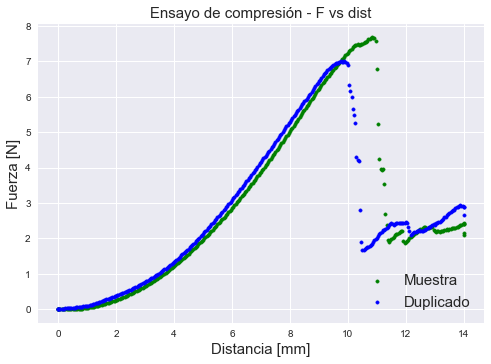

In [2]:
colores = ['green', 'blue']
labels = ['Muestra', 'Duplicado']

plt.title('Ensayo de compresión - F vs dist', fontsize=15)
plt.ylabel('Fuerza [N]', fontsize=15)
plt.xlabel('Distancia [mm]', fontsize=15)
for dato, lab, col in zip(datos, labels, colores):
    plt.scatter(*dato, marker='o', s=12, label=lab, c=col)
plt.legend(loc='lower right', fontsize=15)
plt.savefig('F vs dist - Muestra y dupli.png')
# plt.show()

Ahora vamos a corregir los datos de fuerza ($F$) y distancia ($h$) para convertirlos en esfuerzo ($\sigma$) y deformación relativa($\epsilon$) dividiéndolos por el área de la sección transversal inicial de la muestra ($A_0$) y por la altura inicial de la misma ($h_0$).

In [5]:
h_0 = 0.02
A_0 = (math.pi / 4) * (0.02) ** 2

muestra_1 = datos[0]
muestra_2 = datos[1]

m1_x, m1_y = muestra_1
m2_x, m2_y = muestra_2

m1_x = [i / h_0 for i in m1_x]
m1_y = [i / A_0 for i in m1_y]

m2_x = [i / h_0 for i in m2_x]
m2_y = [i / A_0 for i in m2_y]

In [6]:
plt.close('all')

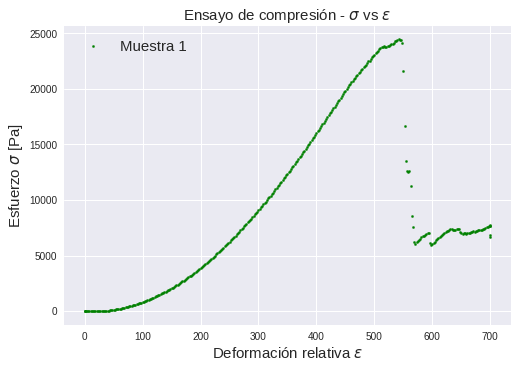

In [7]:
# Graficamos la versión corregida para la Muestra 1

plt.grid(zorder=3)
plt.title('Ensayo de compresión - $\sigma$ vs $\epsilon$', fontsize=15)
plt.xlabel('Deformación relativa $\epsilon$', fontsize=15)
plt.ylabel('Esfuerzo $\sigma$ [Pa]', fontsize=15)
plt.scatter(m1_x, m1_y, zorder=2, s=5, c='green', label='Muestra 1')
plt.legend(loc='upper left', fontsize=15)

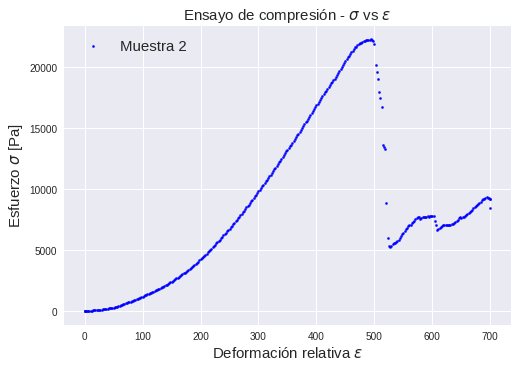

In [8]:
# Graficamos la versión corregida para la Muestra 2

plt.grid(zorder=3)
plt.title('Ensayo de compresión - $\sigma$ vs $\epsilon$', fontsize=15)
plt.xlabel('Deformación relativa $\epsilon$', fontsize=15)
plt.ylabel('Esfuerzo $\sigma$ [Pa]', fontsize=15)
plt.scatter(m2_x, m2_y, zorder=1, s=5, c='blue', label='Muestra 2')
plt.legend(loc='upper left', fontsize=15)


In [9]:
# Creamos una función para encontrar dónde comienza la parte lineal

def inicio_pendiente(dato_x, dato_y, paso=5):
    pend_anterior = 0
    contador = 0
    for i in range(len(dato_x) - paso):
        pend_actual = (dato_y[i+paso]-dato_y[i])/(dato_x[i+paso]-dato_x[i])
#         print(pend_actual)
        if pend_actual > pend_anterior:
            pend_anterior = pend_actual
        else:
            contador += 1
        if contador == 10:
            return i

In [10]:
pend_m1 = inicio_pendiente(m1_x, m1_y, 15)
pend_m2 = inicio_pendiente(m2_x, m2_y, 15)
print(f'Inicio de pendiente en Muestra 1: índice {pend_m1}')
print(f'Inicio de pendiente en Muestra 2: índice {pend_m2}')

Inicio de pendiente en Muestra 1: índice 150
Inicio de pendiente en Muestra 2: índice 145


Acá calculé a partir de qué valor (de índice) empieza a haber comportamiento lineal. Con ese dato nos mandamos a graficar

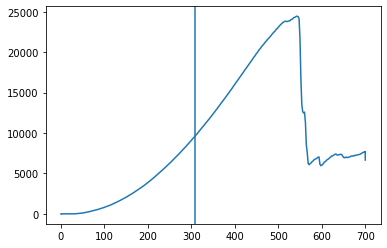

In [79]:
plt.axvline(m1_x[pend_m1])
plt.plot(m1_x, m1_y)

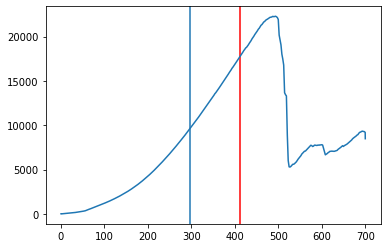

In [88]:
%matplotlib inline
plt.axvline(m2_x[pend_m2])
plt.axvline(m2_x[200], color='red')
plt.plot(m2_x, m2_y)

Me falta ver **HASTA DONDE** graficar. Por ahora lo vamos a hacer a mano (voy a probar hasta un poco antes del máximo ese)

In [11]:
# Acá tenemos los parámetros para trabajar el resto de las cosas

recta_m1 = regresion.lineal(m1_x[145:200], m1_y[145:200])
print(f'Muestra 1\nPendiente: {recta_m1["pendiente"]:.3f} ± {recta_m1["delta_pendiente"]:.2f}\nOrdenada: {recta_m1["ordenada"]:.3f} ± {recta_m1["delta_ordenada"]:.2f}\nR2: {recta_m1["r2"]:.3f}')

recta_m2 = regresion.lineal(m2_x[145:200], m2_y[145:200])
print(f'Muestra 2\nPendiente: {recta_m2["pendiente"]:.3f} ± {recta_m2["delta_pendiente"]:.2f}\nOrdenada: {recta_m2["ordenada"]:.3f} ± {recta_m2["delta_ordenada"]:.2f}\nR2: {recta_m2["r2"]:.3f}')

Muestra 1
Pendiente: 69.993 ± 0.30
Ordenada: -12062.579 ± 106.98
R2: 0.999
Muestra 2
Pendiente: 70.909 ± 0.18
Ordenada: -11544.308 ± 64.36
R2: 1.000


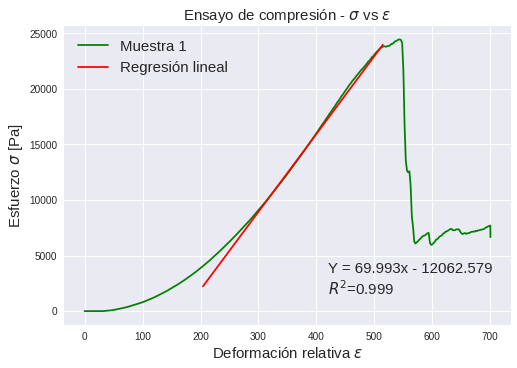

In [12]:
# Pero antes vamos a sacar los gráficos bien lindos

x_recta_m1 = m1_x[100:250]
y_recta_m1 = [recta_m1['pendiente']*x + recta_m1['ordenada'] for x in x_recta_m1]

plt.title('Ensayo de compresión - $\sigma$ vs $\epsilon$', fontsize=15)
plt.xlabel('Deformación relativa $\epsilon$', fontsize=15)
plt.ylabel('Esfuerzo $\sigma$ [Pa]', fontsize=15)

plt.plot(m1_x, m1_y, color='green', label='Muestra 1')
plt.plot(x_recta_m1, y_recta_m1, color='red', label='Regresión lineal')

if recta_m1['ordenada'] >= 0:
    plt.text(max(m1_x) * 0.6, max(m1_y) * 0.06, f'Y = {recta_m1["pendiente"]:.3f}x + {abs(recta_m1["ordenada"]):.3f}\n$R^2$={recta_m1["r2"]:.3f}', fontsize=15)
else:
    plt.text(max(m1_x) * 0.6, max(m1_y) * 0.06, f'Y = {recta_m1["pendiente"]:.3f}x - {abs(recta_m1["ordenada"]):.3f}\n$R^2$={recta_m1["r2"]:.3f}', fontsize=15)

plt.legend(loc='upper left', fontsize=15)

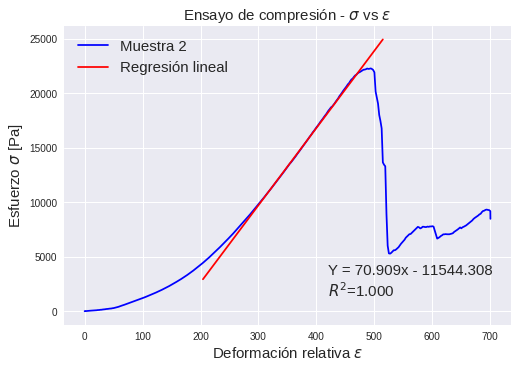

In [13]:
x_recta_m2 = m2_x[100:250]
y_recta_m2 = [recta_m2['pendiente']*x + recta_m2['ordenada'] for x in x_recta_m2]

plt.grid(zorder=3)
plt.title('Ensayo de compresión - $\sigma$ vs $\epsilon$', fontsize=15)
plt.xlabel('Deformación relativa $\epsilon$', fontsize=15)
plt.ylabel('Esfuerzo $\sigma$ [Pa]', fontsize=15)

plt.plot(m2_x, m2_y, color='blue', label='Muestra 2')
plt.plot(x_recta_m2, y_recta_m2, color='red', label='Regresión lineal')

if recta_m2['ordenada'] >= 0:
    plt.text(max(m2_x) * 0.6, max(m2_y) * 0.06, f'Y = {recta_m2["pendiente"]:.3f}x + {abs(recta_m2["ordenada"]):.3f}\n$R^2$={recta_m2["r2"]:.3f}', fontsize=15)
else:
    plt.text(max(m2_x) * 0.6, max(m2_y) * 0.06, f'Y = {recta_m2["pendiente"]:.3f}x - {abs(recta_m2["ordenada"]):.3f}\n$R^2$={recta_m2["r2"]:.3f}', fontsize=15)

plt.legend(loc='upper left', fontsize=15)

Ahora tengo que calcular otros parámetros derivados. Para eso tengo que saber dónde está el máximo donde, luego, la muestra se rompe y cae la fuerza aplicada.

In [80]:
def max_funcion(dato_y):
    maximo = max(dato_y)
    indice = dato_y.index(maximo)
    return indice, maximo

In [81]:
index_max_m1 = max_funcion(m1_y)[0]
index_max_m2 = max_funcion(m2_y)[0]

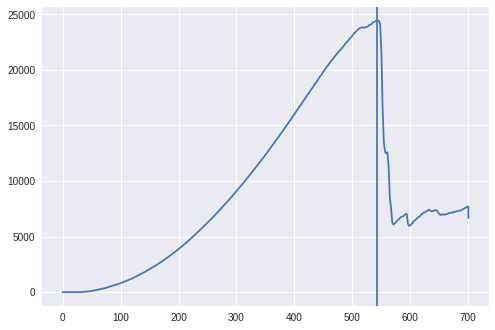

In [82]:
plt.plot(m1_x, m1_y)
plt.axvline(m1_x[index_max_m1])

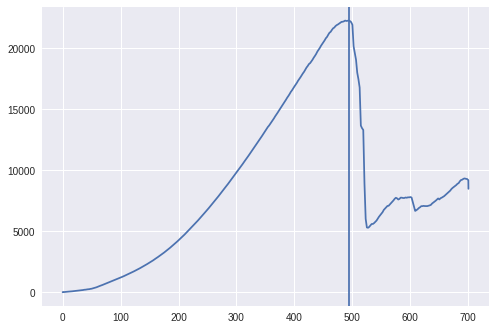

In [83]:
plt.plot(m2_x, m2_y)
plt.axvline(m2_x[index_max_m2])

In [100]:
esfuerzo_m1 = max_funcion(m1_y)[1]
esfuerzo_m2 = max_funcion(m2_y)[1]

defor_m1 = m1_x[max_funcion(m1_y)[0]]
defor_m2 = m2_x[max_funcion(m2_y)[0]]

firmeza_m1 = esfuerzo_m1 / defor_m1
firmeza_m2 = esfuerzo_m2 / defor_m2

datos = (('Esfuerzo', esfuerzo_m1, esfuerzo_m2), ('Deformación', defor_m1, defor_m2), ('Firmeza', firmeza_m1, firmeza_m2))

In [124]:
headers = ('', 'Muestra 1', 'Muestra 2')
print('%12s %12s %12s' % headers)

print(('-'*12 + ' ')*len(headers))

for fila in datos:
#     print('%10s %10.2f %10.2f' % fila)
    print(f'{fila[0]:>12s}{fila[1]:>12.2f}{fila[2]:>12.2f}')

                Muestra 1    Muestra 2
------------ ------------ ------------ 
    Esfuerzo    24434.96    22283.58
 Deformación      541.69      493.76
     Firmeza       45.11       45.13


# Vamos a calcular el resto de porquerías que pedían

- Esfuerzo a la ruptura ($\sigma_r$):
    - Muestra 1: 23330 Pa
    - Muestra 2: 22280 Pa
- Deformación a la ruptura ($\epsilon_r$):
    - Muestra 1: 541.7
    - Muestra 2: 493.8
- Firmeza del material ($\frac{\sigma_r}{\epsilon_r}$):
    - Muestra 1: 45.1
    - Muestra 2: 45.1